<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">
<img src="https://misk.org.sa/miskacademy/wp-content/uploads/sites/5/2019/04/ma-logo-1.png" style="float: left; margin: 20px; height: 55px">



# Modeling   
### Corona

In [270]:
import pandas as pd 
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
from sklearn import tree
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
import pydotplus

In [271]:
cor=pd.read_excel('corona new.xlsx')

In [272]:
## the dataset contain 1088 raws and 20 feature
cor.shape

(1088, 20)

In [273]:
cor.head()

,Unnamed: 0,Country,City,Month_of_infection,Season,Sex,Age,Infection_Causes,Traveling,Contact_Animal,Medical_state_before,Medical_state_after,Deaths_or_recovered,Month_of_death_recovered,Infection_Month,Infection_Year,Death_Month,Death_Year,Survived,Age_bins
0,0,Qatar,Doha,2012-09-01,Autumn,Male,49,unknown,Yes,No,good condition,unknown,death,2013-06-01,9,2012,6.0,2013.0,0,adult
1,1,Saudi Arabia,Asir,2012-06-01,summer,Male,60,unknown,No,Yes,good condition,unknown,death,2012-06-01,6,2012,6.0,2012.0,0,old
2,2,Qatar,Doha,2012-10-01,Autumn,Male,51,unknown,No,No,good condition,Stable,recovered,NaT,10,2012,NaN,NaN,1,adult
3,3,Saudi Arabia,Alhasa,2012-10-01,Autumn,Male,70,unknown,No,No,good condition,unknown,death,2012-10-01,10,2012,10.0,2012.0,0,old
4,5,Saudi Arabia,Alhasa,2012-10-01,Autumn,Male,31,Direct Contact,No,No,good condition,Stable,recovered,2013-11-01,10,2012,11.0,2013.0,1,adult


In [274]:
##check missing values
cor.isnull().sum().sort_values()

Unnamed: 0                    0
Infection_Year                0
Infection_Month               0
Deaths_or_recovered           0
Medical_state_after           0
Medical_state_before          0
Survived                      0
Traveling                     0
Contact_Animal                0
Age                           0
Sex                           0
Season                        0
Month_of_infection            0
City                          0
Country                       0
Infection_Causes              0
Age_bins                      0
Month_of_death_recovered    207
Death_Month                 207
Death_Year                  207
dtype: int64

In [275]:
## delet some unuseful columns
del cor['Month_of_death_recovered']
del cor['Death_Month']
del cor['Death_Year']
del cor['Unnamed: 0']
del cor['Month_of_infection']

In [276]:
## read the columns name
cor.columns

Index(['Country', 'City', 'Season', 'Sex', 'Age', 'Infection_Causes',
       'Traveling', 'Contact_Animal', 'Medical_state_before',
       'Medical_state_after', 'Deaths_or_recovered', 'Infection_Month',
       'Infection_Year', 'Survived', 'Age_bins'],
      dtype='object')

###  create dummy variables

In [277]:
cor=pd.get_dummies(cor,columns=['Country'])

In [278]:
cor=pd.get_dummies(cor,columns=['Age_bins'])

In [279]:
cor=pd.get_dummies(cor,columns=['City'])

In [280]:
cor=pd.get_dummies(cor,columns=['Season'])

In [281]:
cor=pd.get_dummies(cor,columns=['Contact_Animal'])

In [282]:
cor=pd.get_dummies(cor,columns=['Medical_state_before'])

In [283]:
cor=pd.get_dummies(cor,columns=['Medical_state_after'])

In [284]:
cor=pd.get_dummies(cor,columns=['Infection_Causes'])

In [285]:
cor=pd.get_dummies(cor,columns=['Traveling'])

In [286]:
cor=pd.get_dummies(cor,columns=['Sex'])

In [287]:
cor=pd.get_dummies(cor,columns=['Infection_Month'])

In [288]:
cor=pd.get_dummies(cor,columns=['Infection_Year'])

In [289]:
cor.head()

,Age,Deaths_or_recovered,Survived,Country_Algeria,Country_Austria,Country_China,Country_Egypt,Country_France,Country_Germany,Country_Greece,...,Infection_Month_7,Infection_Month_8,Infection_Month_9,Infection_Month_10,Infection_Month_11,Infection_Month_12,Infection_Year_2012,Infection_Year_2013,Infection_Year_2014,Infection_Year_2015
0,49,death,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,60,death,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,51,recovered,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,70,death,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,31,recovered,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [290]:
## anew columns name
list(cor.columns)

['Age',
 'Deaths_or_recovered',
 'Survived',
 'Country_Algeria',
 'Country_Austria',
 'Country_China',
 'Country_Egypt',
 'Country_France',
 'Country_Germany',
 'Country_Greece',
 'Country_Iran',
 'Country_Jordan',
 'Country_Kuwait',
 'Country_Lebanon',
 'Country_Malaysia',
 'Country_Netherlands',
 'Country_Oman',
 'Country_Philippines',
 'Country_Qatar',
 'Country_Saudi Arabia',
 'Country_South Korea',
 'Country_Spain',
 'Country_Thailand',
 'Country_Tunisia',
 'Country_Turkey',
 'Country_United Arab Emirates',
 'Country_United Kingdom',
 'Country_United States',
 'Country_Yemen',
 'Age_bins_adult',
 'Age_bins_child',
 'Age_bins_old',
 'City_Abha',
 'City_Abqaiq',
 'City_Abu dhabi',
 'City_Afif',
 'City_Aflaj',
 'City_Al-Dawadmi',
 'City_AlKharj',
 'City_AlQahmah',
 'City_Albadaya',
 'City_Aldilam',
 'City_Algeria',
 'City_Alhanakiah',
 'City_Alhasa',
 'City_Aljouf',
 'City_Alkhafji',
 'City_Almkwhah ',
 'City_Alnumas',
 'City_Aloyon',
 'City_Alras',
 'City_Alzulfi',
 'City_Amman',
 '

# The baseline Accuracy

In [291]:
#calculate the baseline accuracy
accuracy_bas=1-cor.Survived.mean()
accuracy_bas

0.6231617647058824

In [292]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error

# Logistic regeession with the benefit of Age

In [293]:
#Selecting Features 
#Create X and y
X =cor.drop(columns=['Survived','Deaths_or_recovered','Age_bins_adult','Age_bins_old','Age_bins_child','Infection_Month_1','Infection_Month_2','Infection_Month_3','Infection_Month_4',
                    'Infection_Month_5','Infection_Month_6','Infection_Month_7','Infection_Month_8','Infection_Month_9','Infection_Month_10',
                    'Infection_Month_11','Infection_Month_12'])# Features
y = cor['Survived'] # Target variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(870, 143) (218, 143) (870,) (218,)


In [294]:
# Fit a logistic regression model
LR = LogisticRegression()
LR.fit(X_train,y_train)

C:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [295]:
y_pred= LR.predict(X_test)
print(y_pred[:5])
print((metrics.accuracy_score(y_test, y_pred)))

[1 0 1 0 0]
0.7844036697247706


In [296]:
LR.score(X_test, y_test)

0.7844036697247706

In [297]:
#examine the coefficients
LR.coef_

array([[-0.03211681, -0.04306517,  0.21124007, -0.05133311, -0.37906951,
        -0.03003564, -0.24905355, -0.03222495,  0.12439594, -1.08772308,
        -0.05323581,  0.43215586, -0.05346722, -0.20551391,  0.12401681,
        -0.34090956,  0.53803664,  1.75301086, -0.53576683,  0.39705333,
        -0.16114724, -0.2036666 ,  0.        , -0.29363915,  0.3697699 ,
        -0.3597168 , -0.02935958, -0.13757742, -0.26678419, -0.0174539 ,
         0.        , -0.05170291, -0.06275095,  0.02790205, -0.45161902,
        -0.34259288, -0.04975994, -0.04306517,  0.        ,  0.4059624 ,
         0.41711868,  0.03300641, -0.31772039,  0.62207848,  0.        ,
        -0.31324354, -0.33912525, -0.85131835, -0.20551391,  0.20649952,
        -0.07307184, -0.08312919, -0.03222495, -0.16114724, -0.01903745,
        -0.24905355, -0.10873473, -0.32348764, -0.37906951, -0.0671389 ,
         0.47662322,  0.26320647, -0.6423839 ,  0.58466733,  0.44472823,
        -0.25837583,  0.79508534, -0.02935958,  0.3

In [298]:
LR.intercept_

array([-0.1592483])

In [299]:
## Model Evaluation using Confusion Matrix

In [300]:
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[120,  23],
       [ 24,  51]], dtype=int64)

In [301]:
cm = np.array(metrics.confusion_matrix(y_test, y_pred, labels=[0.0, 1.0]))

cm = pd.DataFrame(cm, index=['deceased', 'survived'],

                             columns=['predict_deceased',

                                      'predict_survived']); cm

,predict_deceased,predict_survived
deceased,120,23
survived,24,51


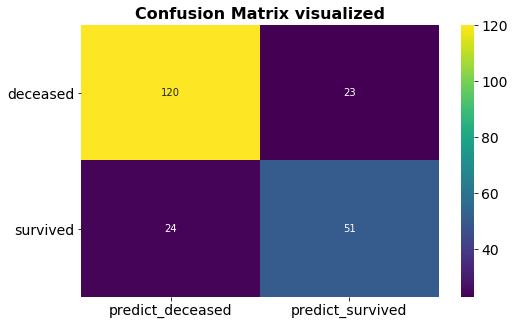

In [302]:
#Visualizing Confusion Matrix using Heatmap
plt.subplots(figsize=(8, 5))

plt.title('Confusion Matrix visualized',

          fontweight='bold', fontsize=16)

sns.heatmap(cm, annot=True, cmap='viridis', fmt='')

plt.rcParams['xtick.labelsize']=14

plt.rcParams['ytick.labelsize']=14

plt.yticks(rotation=0);

- **True positives (TP):** These are cases in which we predicted (Recovered), and they actually are recovered.
- **True negatives (TN):** We predicted (Death), and they are death.
- **False positives (FP):** We predicted Recovered, but they were not actually recovered. 
- **False negatives (FN):** We predicted Death, but they are Recovered. 


In [303]:
#Confusion Matrix Evaluation Metrics
#We can check precision, recall,f1-score using classification report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       143
           1       0.69      0.68      0.68        75

   micro avg       0.78      0.78      0.78       218
   macro avg       0.76      0.76      0.76       218
weighted avg       0.78      0.78      0.78       218



In [304]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))

Accuracy: 0.7844036697247706
Precision: 0.6891891891891891


In [305]:
error=mean_squared_error(y_test, y_pred)
error

0.21559633027522937

In [306]:
cor.columns

Index(['Age', 'Deaths_or_recovered', 'Survived', 'Country_Algeria',
       'Country_Austria', 'Country_China', 'Country_Egypt', 'Country_France',
       'Country_Germany', 'Country_Greece',
       ...
       'Infection_Month_7', 'Infection_Month_8', 'Infection_Month_9',
       'Infection_Month_10', 'Infection_Month_11', 'Infection_Month_12',
       'Infection_Year_2012', 'Infection_Year_2013', 'Infection_Year_2014',
       'Infection_Year_2015'],
      dtype='object', length=160)

## THE ROC CURVE

In [307]:
#Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate

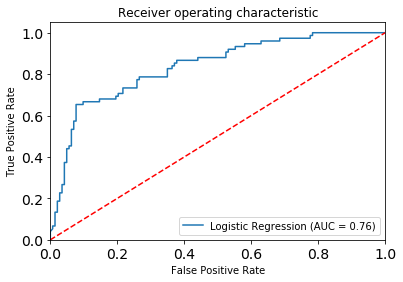

In [308]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, LR.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, LR.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (AUC = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

**True positive rate (TPR)** how many were accurately predicted to belong to that class


**False positive rate (FPR)** how many were predicted as belonging to that target class label

# Over-sampling using SMOTE

**Imbalanced Dataset**

So we going to use SMOTE with accuracy : 0.7477064220183486 

In [309]:

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
 
# import SMOTE module from imblearn library  
from imblearn.over_sampling import SMOTE 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sm = SMOTE() 
X_train, y_train = sm.fit_sample(X_train, y_train) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train == 0))) 


Before OverSampling, counts of label '1': 335
Before OverSampling, counts of label '0': 535 

After OverSampling, the shape of train_X: (1110, 143)
After OverSampling, the shape of train_y: (1110,) 

After OverSampling, counts of label '1': 555
After OverSampling, counts of label '0': 555


In [310]:
LR = LogisticRegression()
LR.fit(X_train,y_train)
y_pred= LR.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred)))

0.7522935779816514


C:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [311]:
confusion_matrix(y_test, y_pred)

array([[101,  22],
       [ 32,  63]], dtype=int64)

In [312]:
#We can check precision, recall,f1-score using classification report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79       123
           1       0.74      0.66      0.70        95

   micro avg       0.75      0.75      0.75       218
   macro avg       0.75      0.74      0.74       218
weighted avg       0.75      0.75      0.75       218



## THE ROC CURVE

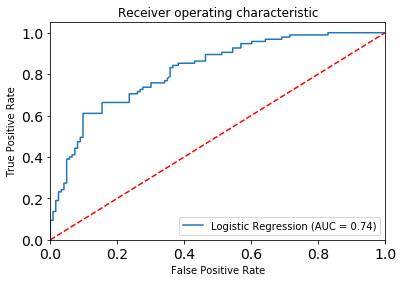

In [313]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, LR.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, LR.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (AUC = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

**True positive rate (TPR)** how many were accurately predicted to belong to that class


**False positive rate (FPR)** how many were predicted as belonging to that target class label

# Logistic regeession without  the benefit of Age

In [314]:
#Selecting Features 
#Create X and y
X =cor.drop(columns=['Survived','Deaths_or_recovered','Age_bins_adult','Age_bins_old','Age_bins_child','Infection_Month_1','Infection_Month_2','Infection_Month_3','Infection_Month_4',
                    'Infection_Month_5','Infection_Month_6','Infection_Month_7','Infection_Month_8','Infection_Month_9','Infection_Month_10',
                    'Infection_Month_11','Infection_Month_12','Age'])# Features
y = cor['Survived']# Target variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(870, 142) (218, 142) (870,) (218,)


In [315]:
# Fit a logistic regression model
LR = LogisticRegression()
LR.fit(X_train,y_train)

C:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [316]:
y_pred= LR.predict(X_test)
print(y_pred[:30])
print((metrics.accuracy_score(y_test, y_pred)))

[1 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0]
0.7889908256880734


In [317]:
LR.score(X_test, y_test)

0.7889908256880734

In [318]:
LR.coef_

array([[-0.04312283,  0.3144367 , -0.05255409, -0.31080932,  0.        ,
        -0.31011027, -0.04312283,  0.19827504, -1.02501385, -0.12438526,
         0.36347105, -0.05500821, -0.47053038,  0.10565595, -0.23904926,
         0.51971702,  1.73021265, -0.58259988,  0.36834917, -0.17166856,
        -0.2204406 ,  0.        , -0.27866016,  0.33364557, -0.49071155,
         0.        , -0.14000729,  0.        , -0.06140802, -0.36240507,
        -0.12684721, -0.06492525, -0.07079821, -0.4694707 , -0.34892096,
        -0.13190301, -0.04312283,  0.73866402,  0.17199368,  0.62879528,
         0.22796729, -0.22292954,  0.61176148,  0.09822569, -0.11833833,
        -0.33702557, -0.73448941, -0.47053038,  0.20761331, -0.11456536,
        -0.32058699, -0.04312283, -0.17166856,  0.        , -0.31011027,
        -0.12966579, -0.77951521, -0.31080932, -0.18490963,  0.44014212,
         0.32046852, -0.78311749,  0.51971702,  0.27872246, -0.18308672,
         0.44295806,  0.        ,  0.24446205,  0.1

In [319]:
LR.intercept_

array([-0.4840239])

In [320]:
## Model Evaluation using Confusion Matrix

In [321]:
cm = np.array(metrics.confusion_matrix(y_test, y_pred, labels=[0.0, 1.0]))

cm = pd.DataFrame(cm, index=['deceased', 'survived'],

                             columns=['predict_deceased',

                                      'predict_survived']); cm

,predict_deceased,predict_survived
deceased,120,16
survived,30,52


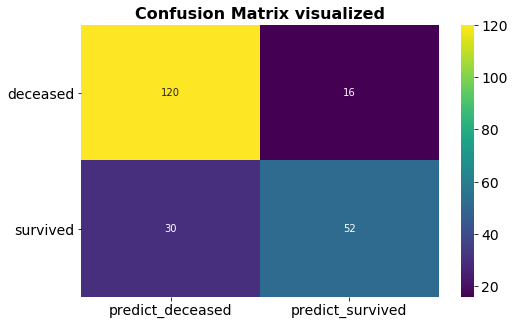

In [322]:
#Visualizing Confusion Matrix using Heatmap
plt.subplots(figsize=(8, 5))

plt.title('Confusion Matrix visualized',

          fontweight='bold', fontsize=16)

sns.heatmap(cm, annot=True, cmap='viridis', fmt='')

plt.rcParams['xtick.labelsize']=14

plt.rcParams['ytick.labelsize']=14

plt.yticks(rotation=0);

- **True positives (TP):** These are cases in which we predicted (Recovered), and they actually are recovered.
- **True negatives (TN):** We predicted (Death), and they are death.
- **False positives (FP):** We predicted Recovered, but they were not actually recovered. 
- **False negatives (FN):** We predicted Death, but they are Recovered. 

In [323]:
#We can check precision, recall,f1-score using classification report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       136
           1       0.76      0.63      0.69        82

   micro avg       0.79      0.79      0.79       218
   macro avg       0.78      0.76      0.77       218
weighted avg       0.79      0.79      0.78       218



In [324]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))

Accuracy: 0.7889908256880734
Precision: 0.7647058823529411


In [325]:
error=mean_squared_error(y_test, y_pred)
error

0.21100917431192662

## THE ROC CURVE

In [326]:
#Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate

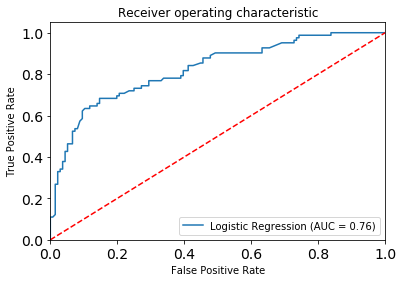

In [327]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, LR.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, LR.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (AUC = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

**True positive rate (TPR)** how many were accurately predicted to belong to that class


**False positive rate (FPR)** how many were predicted as belonging to that target class label

**Imbalanced Dataset**

# Over-sampling using SMOTE

In [328]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
 
# import SMOTE module from imblearn library  
from imblearn.over_sampling import SMOTE 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sm = SMOTE() 
X_train, y_train = sm.fit_sample(X_train, y_train) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train == 0))) 


Before OverSampling, counts of label '1': 328
Before OverSampling, counts of label '0': 542 

After OverSampling, the shape of train_X: (1110, 142)
After OverSampling, the shape of train_y: (1110,) 

After OverSampling, counts of label '1': 555
After OverSampling, counts of label '0': 555


In [329]:
LR = LogisticRegression()
LR.fit(X_train,y_train)
y_pred= LR.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred)))

0.7293577981651376


C:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\anaconda\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [330]:
confusion_matrix(y_test, y_pred)

array([[98, 25],
       [34, 61]], dtype=int64)

In [331]:
#We can check precision, recall,f1-score using classification report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77       123
           1       0.71      0.64      0.67        95

   micro avg       0.73      0.73      0.73       218
   macro avg       0.73      0.72      0.72       218
weighted avg       0.73      0.73      0.73       218



## THE ROC CURVE

In [332]:
#Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate

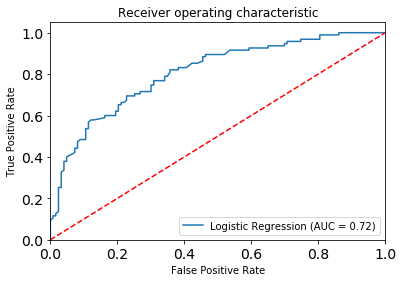

In [333]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, LR.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, LR.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (AUC = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

**True positive rate (TPR)** how many were accurately predicted to belong to that class


**False positive rate (FPR)** how many were predicted as belonging to that target class label

### by comparing the two version of logistic regression models we find that the age is important and effect on the model accurcy.

# Random forest

### we derived feature importance. it's a ccurate way of selecting good feature for our model. The hiegher value the more important the feature.

In [334]:
#Selecting Features 
#Create X and y
X =cor.drop(columns=['Survived','Deaths_or_recovered','Age_bins_adult','Age_bins_old','Age_bins_child','Infection_Month_1','Infection_Month_2','Infection_Month_3','Infection_Month_4',
                    'Infection_Month_5','Infection_Month_6','Infection_Month_7','Infection_Month_8','Infection_Month_9','Infection_Month_10',
                    'Infection_Month_11','Infection_Month_12'])
y = cor['Survived']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(761, 143) (327, 143) (761,) (327,)


In [335]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

clf = RandomForestClassifier(max_features = 2, random_state = 0).fit(X_train, y_train)

print('Accuracy of RF classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of RF classifier on training set: 0.97
Accuracy of RF classifier on test set: 0.72


C:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [336]:
# Set features variable with the names of the features in X
features = X.columns
"Feature columns:", features

# Set feature_importances variable using the attribute "feature_importances_".
# The higher the score, the more important the feature in that particular combination.
# If you changed the features in X it would impact the scores. Similar to coefficients.
feature_importances = clf.feature_importances_
"Feature Importance scores:", feature_importances

# Create a dataframe of the features and their respective importance scores
features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})

# Sort the values by "Importance Score" with ascending in false to ensure
# the score appear from highest to lowest in the new dataframe
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df.head()

,Features,Importance Score
0,Age,0.289959
129,Medical_state_after_Stable,0.096183
128,Medical_state_after_Critical,0.051547
130,Medical_state_after_unknown,0.033985
131,Infection_Causes_Air,0.030964


In [339]:
### the most feature impact our model is age then the medidcal state of the patient 

In [337]:
y_pred= clf.predict(X_test)

In [338]:
#We can check precision, recall,f1-score using classification report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.86      0.78       156
           1       0.74      0.54      0.63       116

   micro avg       0.72      0.72      0.72       272
   macro avg       0.73      0.70      0.70       272
weighted avg       0.73      0.72      0.72       272

